<a href="https://colab.research.google.com/github/RaianaSeixas/0_paper_one_revisited/blob/main/CEC14/TESTS/C_Frannk_F23_crossp%3D1%3Bmut4%3D0_75%3Bcrossp4%3D0_75_cec2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann
from pandas import read_csv

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 378 (delta 37), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (378/378), 327.66 KiB | 7.99 MiB/s, done.
Resolving deltas: 100% (218/218), done.
/content/optim_raianars_Insight


In [2]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 272 (delta 82), reused 143 (delta 82), pack-reused 129
Receiving objects: 100% (272/272), 659.28 KiB | 11.57 MiB/s, done.
Resolving deltas: 100% (154/154), done.
/content/optim_raianars_Insight/Raianars_paper_One


In [3]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=1000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=1

#fator = 1.0/3.0; 
Fi=mut;CRi=crossp;# para impressão
fator = 1.0/3.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.75;crossp4=0.75;


In [4]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [5]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 378 (delta 37), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (378/378), 327.66 KiB | 4.31 MiB/s, done.
Resolving deltas: 100% (218/218), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [6]:
#!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
#%cd Raianars_paper_One

!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

Cloning into 'Raianars_Routines'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 77 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [7]:
!git clone https://github.com/ucfilho/functions_cec2014_data
%cd functions_cec2014_data
import F1_to_F27_cec2014_zero_to_hero
import cec2014_names
import cec2014_shift_rotate

Cloning into 'functions_cec2014_data'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 300 (delta 2), reused 0 (delta 0), pack-reused 294
Receiving objects: 100% (300/300), 465.31 KiB | 6.94 MiB/s, done.
Resolving deltas: 100% (181/181), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data


In [8]:
function_select = 'F23'

problem_size = 30 # possibles 2, 10, 20, 30, 50, 100

In [9]:
dim = problem_size 

In [10]:
if function_select == 'F28':
  hybrid_choice = 'F15'


In [11]:
!pip install --upgrade --no-cache-dir gdown

In [12]:
# !gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
# https://drive.google.com/file/d/1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz/view?usp=sharing
!gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
To: /content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/cec2014.zip
100% 36.1M/36.1M [00:00<00:00, 144MB/s] 


In [13]:
import zipfile
file_name = zipfile.ZipFile('cec2014.zip', 'r')
file_name.extractall()

In [14]:

Function_CEC2014 =function_select + "_" + cec2014_names.NamesFunctions()[function_select]+"_D_"+str(problem_size)

f_matrix = "M_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+function_select[1:]+".txt"
shift_data = load_shift_data__(shift_data_file)[:problem_size]
matrix = load_matrix_data__(f_matrix)
f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)

f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
f2_bent_cigar__ = F1_to_F27_cec2014_zero_to_hero.f2_bent_cigar__ 
f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 
f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__
f4_rosenbrock__   =  F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__

def F23(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    xichma = np.array([10, 20, 30, 40, 50])
    lamda = np.array([1, 1e-6, 1e-26, 1e-6, 1e-6])
    bias = np.array([0, 100, 200, 300, 400])

  
    # 1. Rotated Rosenbrock’s Function F4’
    t1 = solution - shift_data[0]
    g1 = lamda[0] * f4_rosenbrock__(np.dot(t1, matrix[:problem_size, :])) + bias[0]
    w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

    # 2. High Conditioned Elliptic Function F1’
    t2 = solution - shift_data[1]
    g2 = lamda[1] * f1_elliptic__(solution) + bias[1]
    w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

    # 3. Rotated Bent Cigar Function F2’
    t3 = solution - shift_data[2]
    g3 = lamda[2] * f2_bent_cigar__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
    w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

    # 4. Rotated Discus Function F3’
    t4 = solution - shift_data[3]
    g4 = lamda[3] * f3_discus__(np.dot(matrix[3 * problem_size: 4 * problem_size, :], t4)) + bias[3]
    w4 = (1.0 / np.sqrt(sum(t4 ** 2))) * np.exp(-sum(t4 ** 2) / (2 * problem_size * xichma[3] ** 2))

    # 4. High Conditioned Elliptic Function F1’
    t5 = solution - shift_data[4]
    g5 = lamda[4] * f1_elliptic__(solution) + bias[4]
    w5 = (1.0 / np.sqrt(sum(t5 ** 2))) * np.exp(-sum(t5 ** 2) / (2 * problem_size * xichma[4] ** 2))

    sw = sum([w1, w2, w3, w4, w5])
    result = (w1 * g1 + w2 * g2 + w3 * g3 + w4 * g4 + w5 * g5) / sw
    return result #+ f_bias

In [15]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [16]:
if function_select == 'F28':
  Function = F28
if function_select == 'F25':
  Function = F25
if function_select == 'F24':
  Function = F24
if function_select == 'F23':
  Function = F23
    
fobj=Function
Fun = Function

In [17]:
SUPPORT_DIMENSION = [2, 10, 20, 30, 50, 100]
SUPPORT_DIMENSION_2 = [10, 20, 30, 50, 100]

#def Fun(solution,shift_data=shift_data_a, matrix=matrix_a, shuffle):#, bias=F_bias):
def CEC2014(solution, shift_data ,  matrix, shuffle):#, bias=F_bias):
  if(type_fun == 'shift_rotate'):
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = Function(z) + F_bias
  elif(type_fun =='hybrid'): # F17 to F22
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = z + F_bias
 
  return result

In [18]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 272 (delta 82), reused 143 (delta 82), pack-reused 129
Receiving objects: 100% (272/272), 659.28 KiB | 10.99 MiB/s, done.
Resolving deltas: 100% (154/154), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One


In [19]:
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [20]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix


In [21]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [22]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [23]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [24]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [25]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [26]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [27]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

#dimensions=len(MAX)
dimensions=dim
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim


MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.3333333333333333
Npar1= 34
Npar2= 22
Npar3= 22
Npar4= 22
Npar= 100


In [28]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind, shift_data , matrix, shuffle) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo

    Fuma = f1_elliptic__  # Fuma era Fun
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fuma)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 2.787829637527466 FO= 254.3040508714554
k= 1 time= 5.350559039910634 FO= 254.30405087145488
k= 2 time= 7.928135081132253 FO= 254.3040508714551
k= 3 time= 10.504289933045705 FO= 254.30405087148503
k= 4 time= 13.082361308733622 FO= 254.6049575101281
k= 5 time= 15.614320115248363 FO= 254.30405087145496
k= 6 time= 18.18425452709198 FO= 254.30405087185773
k= 7 time= 20.860198259353638 FO= 254.304050871455
k= 9 time= 25.81182314157486 FO= 254.30405087145496
k= 10 time= 28.3443248907725 FO= 254.30405087145593
k= 11 time= 31.047689461708067 FO= 254.30405087145533
k= 12 time= 33.500283646583554 FO= 255.60823540644853
k= 13 time= 35.890913379192355 FO= 254.30405087145556
k= 14 time= 38.32842881679535 FO= 254.30405087145473
k= 15 time= 40.740096219380696 FO= 254.3040508714551
k= 16 time= 43.14008433421453 FO= 254.3040508714549
k= 17 time= 46.07928382953008 FO= 254.30405087145476
k= 18 time= 48.980272912979125 FO= 254.30405087145502
k= 19 time= 51.62533010641734 FO= 254.30405087145488
k

In [29]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [30]:
pd.set_option('display.max_columns', 30)  
print(df)

     DIVERSIDADE (DI)   DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0        3.234673e+02  1.038031e+00  0.000227         0.0      0.0  34.0   
1        3.184946e+02  1.022073e+00  0.000453         2.0      2.0  34.0   
2        3.162033e+02  1.014720e+00  0.000680         0.0      0.0  34.0   
3        3.091271e+02  9.920123e-01  0.000907         1.0      2.0  34.0   
4        2.804426e+02  8.999615e-01  0.001133         1.0      2.0  34.0   
..                ...           ...       ...         ...      ...   ...   
995      3.282737e-14  1.053455e-16  0.225760         0.0      0.0  34.0   
996      3.282737e-14  1.053455e-16  0.225987         0.0      0.0  34.0   
997      3.282737e-14  1.053455e-16  0.226213         0.0      0.0  34.0   
998      3.282737e-14  1.053455e-16  0.226440         0.0      0.0  34.0   
999      3.282737e-14  1.053455e-16  0.226667         0.0      0.0  34.0   

           Fo  CRo         fmin          fmax  AD_fmin  AD_fmax  DELTA FOBJ  \
0    0.5

Text(0, 0.5, 'CR')

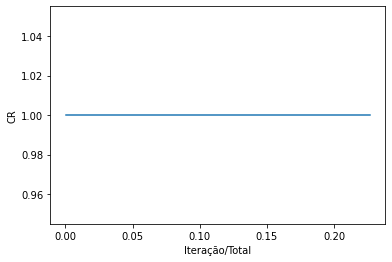

In [31]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

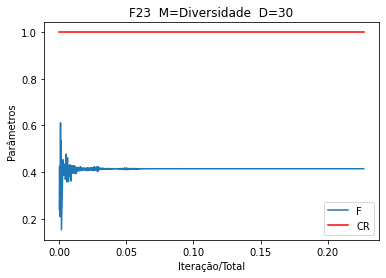

In [32]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'F23_Diversidade_D=30')

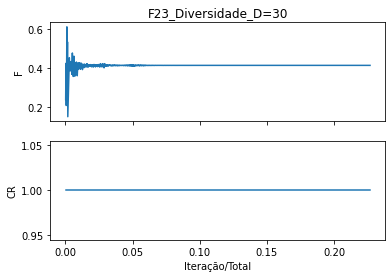

In [33]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [34]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 0.33 NPAR= 100 Iterações= 1000 Dim= 30 Min/Max= -100 / 100 _ F23
SUB_Fo-0.5_CRo-1_D-30_Interv-1000 

MÉDIA:  254.37066704828752 STD __: 0.23361499674434713
MIN __: 254.3040508714547 MAX__:  255.60823540644853
254.37066704828752
0.23361499674434713
254.3040508714547
Tempo Médio= 151.118 segundos ---
50 Rodadas

BEST:  [ 4.80970816e+00 -8.28653933e+01 -8.35937717e+01 -8.33764828e+01
 -8.28317236e+01 -8.26949113e+01 -8.09567870e+01 -8.26708708e+01
 -8.26445910e+01 -7.69302092e+01 -7.76698000e+01  4.51371917e+01
 -7.50491943e+01 -7.20230229e+01 -7.35786644e+01  2.80157432e+01
 -7.23444015e+01 -3.88121635e+01 -3.00258028e+01 -2.13691489e+01
 -1.20279681e+01 -9.72331507e+00 -9.03865562e-01 -4.13783705e+00
 -2.62847451e+00 -1.65054180e+00 -1.03239364e+00 -2.35184770e-01
 -4.00753008e-01 -2.48866317e-01  2.54304051e+02]
